In [92]:
# 1. Loading dataset and plotting graph

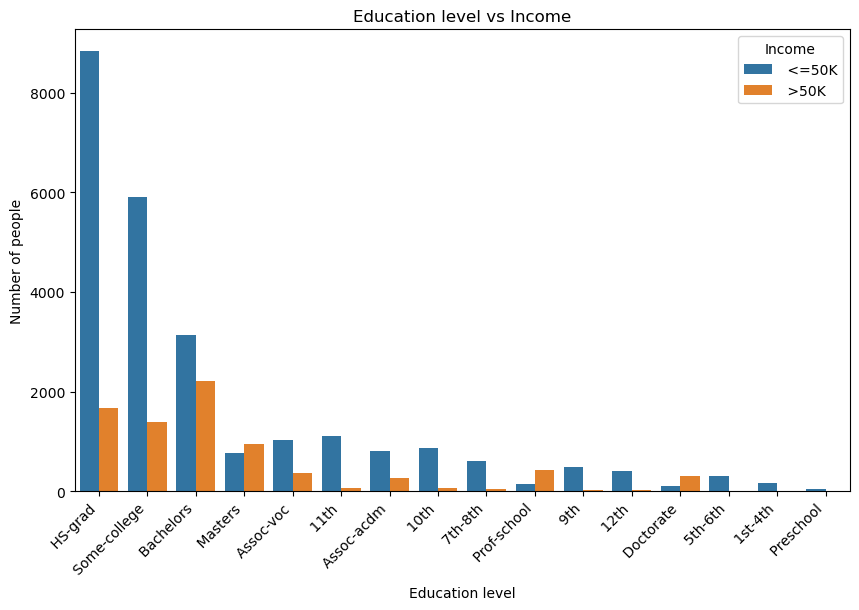

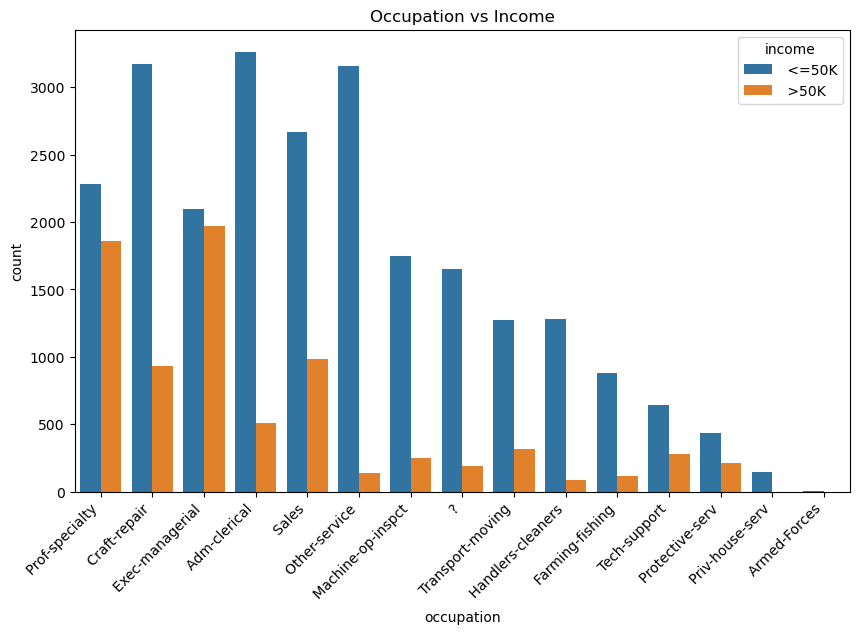

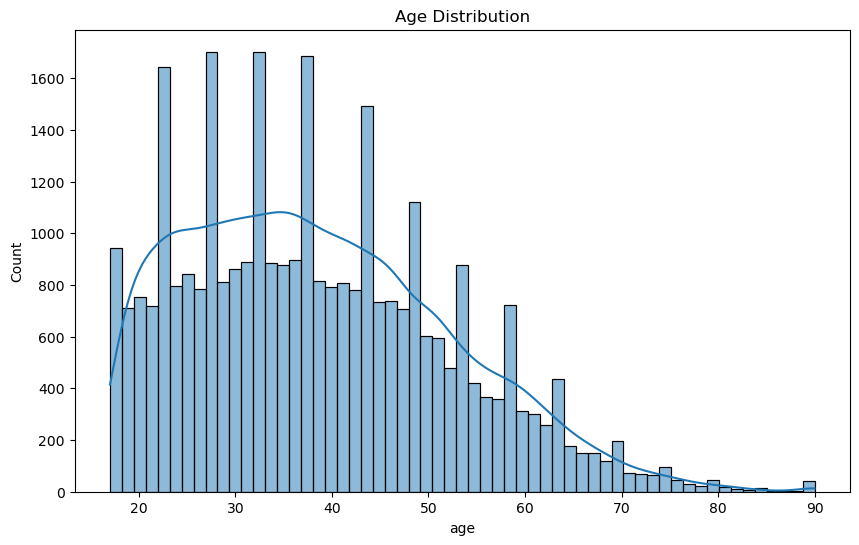

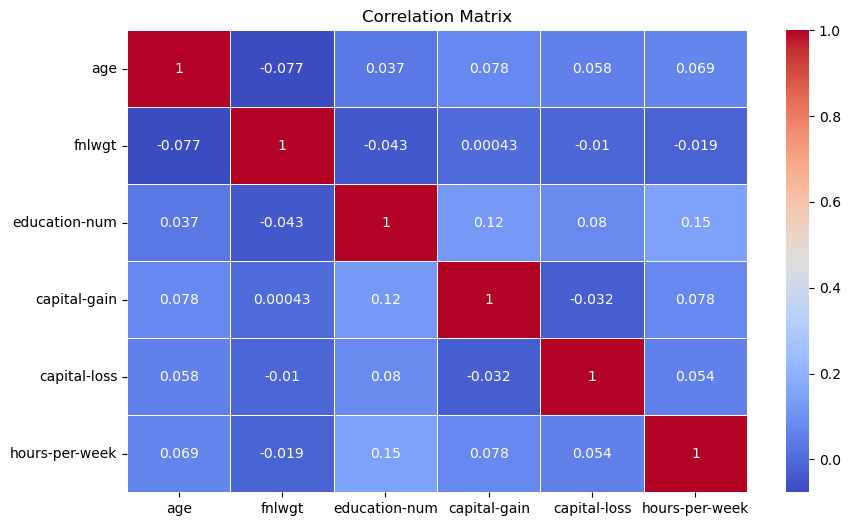

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [9]:
#SD7502 Assignment 1
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

#Lodaing the dataset using pandas
df = pd.read_csv('F:\Jordan\Documents\Github\SD7502-Assignment-1\Datasets\income_evaluation.csv')

#Cleaning the column names by removing leading whitespace
df.columns = df.columns.str.strip()

#Creating bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='education', hue='income', order=df['education'].value_counts().index)
plt.title('Education level vs Income')
plt.xlabel('Education level')
plt.ylabel('Number of people')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income')
plt.show()

#A second bar plot to compare occupation vs income
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='occupation', hue='income', order=df['occupation'].value_counts().index)
plt.title('Occupation vs Income')
plt.xticks(rotation=45, ha='right')
plt.show()

#Creating histogram plot for further analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

#Selecting numerical values only for colleration matrix
numerical_df = df.select_dtypes(include=['int64', 'float64'])

#Creating colleration matrix for further analysis
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#Providing a description of the dataset
print(df.describe())

In [12]:
# 2A. Creating and Training Models

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

#Defining the target and features
X = df.drop('income', axis=1)
y = df['income'].apply(lambda x: 1 if x == ' >50K' else 0)

#Identifying the categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

#Defining preprocessing for numerical columns (scaling)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#Defining preprocessing for categorical columns (encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#Combining preprocessing data
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

#Apply the preprocessing pipeline to the dataset
X_preprocessed = preprocessor.fit_transform(X)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42, stratify=y)

print(df['income'].unique())
print(y.value_counts())

[' <=50K' ' >50K']
0    24720
1     7841
Name: income, dtype: int64


In [14]:
#Creating and testing Logistic Regression Model
logistic_model = LogisticRegression(random_state=42, max_iter=500)
logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))

#Creating and testing Support Vector Machine (SVM) Model
svm_model = SVC(random_state=42)

svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4945
           1       0.74      0.62      0.67      1568

    accuracy                           0.86      6513
   macro avg       0.81      0.78      0.79      6513
weighted avg       0.85      0.86      0.85      6513

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4945
           1       0.77      0.60      0.67      1568

    accuracy                           0.86      6513
   macro avg       0.82      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513



In [15]:
#Creating and training Random Forest Model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

#Creating and testing Gradient Boosting Model 
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train, y_train)
y_pred_gb = gradient_boosting_model.predict(X_test)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4945
           1       0.74      0.64      0.68      1568

    accuracy                           0.86      6513
   macro avg       0.81      0.78      0.80      6513
weighted avg       0.85      0.86      0.85      6513

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4945
           1       0.79      0.62      0.70      1568

    accuracy                           0.87      6513
   macro avg       0.84      0.79      0.81      6513
weighted avg       0.86      0.87      0.86      6513



In [16]:
# 2B: Feature selection

<function matplotlib.pyplot.show(close=None, block=None)>

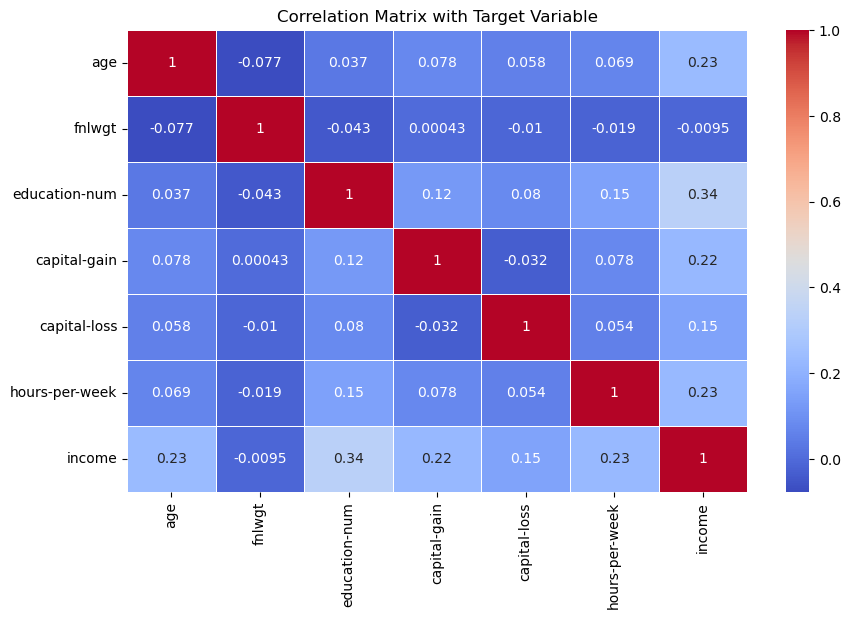

In [16]:
#Using Correlation Heatmap to identify highly correlated features which could be
#Redundant

#Combining numerical features with the target variable
df_selected = pd.concat([X[numerical_cols], y], axis=1)

#To calculate the correlation matrix
corr_matrix = df_selected.corr()

#Plotting the heatmap using matplotlib
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix with Target Variable')
plt.show

Top 10 most important features
 num__fnlwgt                                0.163778
num__age                                   0.152552
num__capital-gain                          0.094236
num__hours-per-week                        0.082519
cat__marital-status_ Married-civ-spouse    0.068388
num__education-num                         0.062854
cat__relationship_ Husband                 0.038937
num__capital-loss                          0.028967
cat__marital-status_ Never-married         0.019744
cat__occupation_ Exec-managerial           0.017476
dtype: float64


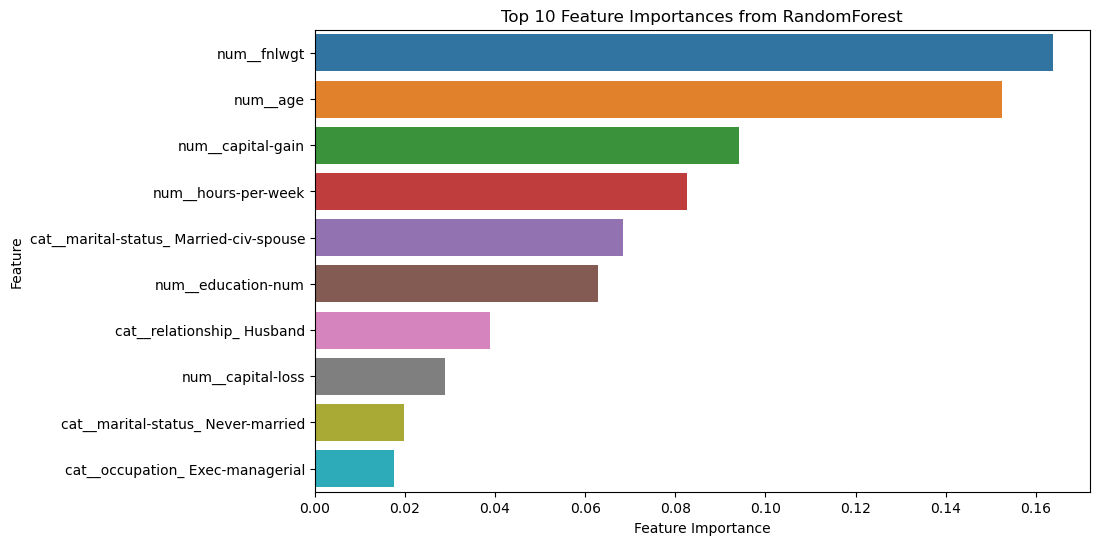

In [17]:
#Using Random Forest for Feature Selection

from sklearn.ensemble import RandomForestClassifier

#Initialising the model
rf_model = RandomForestClassifier(random_state=42)

#Fitting the model on the preprocessed data
rf_model.fit(X_preprocessed, y)

#Getting feature importances
importances = rf_model.feature_importances_

#Map the feature importances to feature names
feature_names = preprocessor.get_feature_names_out()
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

#Printing the top 10 most important features for demonstration (via .head())
print("Top 10 most important features\n", feature_importances.head(10))

#Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.head(10), y=feature_importances.head(10).index)
plt.title("Top 10 Feature Importances from RandomForest")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

In [18]:
#Using Recursive Feature Elimination (RFE) to recursively remove the least
#important features and building the model on the features that remain

from sklearn.feature_selection import RFE

#Initialising a logestic regression model for RFE
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

#Performing RFE
rfe = RFE(estimator=logistic_model, n_features_to_select=10)
rfe = rfe.fit(X_preprocessed, y)

#Getting the ranking of features
rfe_ranking = pd.Series(rfe.ranking_, index=feature_names).sort_values()

#Printing the top features selected by RFE
print("Top features selected by RFE", rfe_ranking[rfe_ranking == 1].index.tolist())

Top features selected by RFE ['cat__native-country_ Columbia', 'cat__occupation_ Priv-house-serv', 'cat__marital-status_ Married-civ-spouse', 'cat__marital-status_ Married-AF-spouse', 'cat__relationship_ Own-child', 'cat__education_ Preschool', 'cat__occupation_ Handlers-cleaners', 'cat__native-country_ Dominican-Republic', 'cat__occupation_ Other-service', 'num__capital-gain']


In [19]:
#Using the Chi-Square test for categorical features. This shows which features
#have the strongest relationship with the target variable

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

#Re-applying preprocessing but without scaling, as Chi-Square test can
#only accept non-negative values
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#Applying the transformation to categorical data only 
X_categorical = categorical_transformer.fit_transform(X[categorical_cols])

#Selecting the top 10 features with the highest chi-square scores
chi2_selector = SelectKBest(chi2, k=10)
X_kbest = chi2_selector.fit_transform(X_categorical, y)

#Getting the selected feature names
selected_features = categorical_transformer.named_steps['onehot'].get_feature_names_out(categorical_cols)[chi2_selector.get_support()]

#Printing the top 10 features selected by Chi-Square test
print("Top 10 features selected by Chi-Square test:\n", selected_features)

Top 10 features selected by Chi-Square test:
 ['education_ Bachelors' 'education_ Masters'
 'marital-status_ Married-civ-spouse' 'marital-status_ Never-married'
 'occupation_ Exec-managerial' 'occupation_ Prof-specialty'
 'relationship_ Husband' 'relationship_ Not-in-family'
 'relationship_ Own-child' 'sex_ Female']


In [24]:
# 2C Constructing prediction models

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Identify categorical columns in your dataset
categorical_columns = X.select_dtypes(include=['object']).columns

# Apply OneHotEncoder to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)],
    remainder='passthrough')  # Leave the rest of the columns (numerical) unchanged

# Transform the dataset
X_transformed = preprocessor.fit_transform(X)

# Convert the sparse matrix to a dense format if necessary
X_transformed_dense = X_transformed.toarray() if hasattr(X_transformed, 'toarray') else X_transformed

# Split the transformed data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed_dense, y, test_size=0.2, random_state=42)

# Feature scaling for SVM (only applies to numerical features after one-hot encoding)
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions with the Random Forest model
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Create and train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions with the SVM model
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the SVM model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4942
           1       0.74      0.64      0.69      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.78      0.80      6513
weighted avg       0.85      0.86      0.86      6513

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4942
           1       0.76      0.56      0.64      1571

    accuracy                           0.85      6513
   macro avg       0.81      0.75      0.77      6513
weighted avg       0.84      0.85      0.84      6513



In [ ]:
# 2D Optimizing models with cross-validation

In [21]:

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
import pandas as pd

# Assuming X and y are your features and target variables

# Identify categorical columns in your dataset
categorical_columns = X.select_dtypes(include=['object']).columns

# Apply OneHotEncoder to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)],
    remainder='passthrough')  # Leave the rest of the columns (numerical) unchanged

# Transform the dataset
X_transformed = preprocessor.fit_transform(X)

# Split the transformed data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Feature scaling for SVM and Logistic Regression
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
# Define the parameter distribution for Logistic Regression
logistic_param_dist = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']  # l1 is for lasso, l2 is for ridge
}

# Set up RandomizedSearchCV for Logistic Regression
logistic_random_search = RandomizedSearchCV(estimator=LogisticRegression(random_state=42, max_iter=500),
                                            param_distributions=logistic_param_dist,
                                            n_iter=20,  # Reduced number of iterations
                                            cv=3,
                                            n_jobs=-1,
                                            verbose=2,
                                            random_state=42)

# Fit the RandomizedSearch to the data
logistic_random_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_logistic_model = logistic_random_search.best_estimator_
print("Best Logistic Regression Parameters:", logistic_random_search.best_params_)

# Make predictions with the best Logistic Regression model
y_pred_logistic_best = best_logistic_model.predict(X_test_scaled)

# Evaluate the optimized Logistic Regression model
print("Optimized Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic_best))



In [ ]:
# Define the expanded parameter distribution for SVM
svm_param_dist = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.1, 0.01],
    'kernel': ['rbf', 'linear']
}

# Set up RandomizedSearchCV for SVM
svm_random_search = RandomizedSearchCV(estimator=SVC(random_state=42),
                                       param_distributions=svm_param_dist,
                                       n_iter=20,  # Reduced number of iterations
                                       cv=3,
                                       n_jobs=-1,
                                       verbose=2,
                                       random_state=42)

# Fit the RandomizedSearch to the data
svm_random_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_svm_model = svm_random_search.best_estimator_
print("Best SVM Parameters:", svm_random_search.best_params_)

# Make predictions with the best SVM model
y_pred_svm_best = best_svm_model.predict(X_test_scaled)

# Evaluate the optimized SVM model
print("Optimized SVM Classification Report:")
print(classification_report(y_test, y_pred_svm_best))




In [ ]:
# Define the parameter distribution for Random Forest
rf_param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}


# Set up RandomizedSearchCV for Random Forest
rf_random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                      param_distributions=rf_param_dist,
                                      n_iter=20,  # Reduced number of iterations
                                      cv=3,
                                      n_jobs=-1,
                                      verbose=2,
                                      random_state=42)

# Fit the RandomizedSearch to the data
rf_random_search.fit(X_train, y_train)

# Get the best parameters and model
best_rf_model = rf_random_search.best_estimator_
print("Best Random Forest Parameters:", rf_random_search.best_params_)

# Make predictions with the best Random Forest model
y_pred_rf_best = best_rf_model.predict(X_test)

# Evaluate the optimized Random Forest model
print("Optimized Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf_best))



In [ ]:
# Define the parameter distribution for Gradient Boosting
gb_param_dist = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Set up RandomizedSearchCV for Gradient Boosting
gb_random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                                      param_distributions=gb_param_dist,
                                      n_iter=20,  # Reduced number of iterations
                                      cv=3,
                                      n_jobs=-1,
                                      verbose=2,
                                      random_state=42)

# Fit the RandomizedSearch to the data
gb_random_search.fit(X_train, y_train)

# Get the best parameters and model
best_gb_model = gb_random_search.best_estimator_
print("Best Gradient Boosting Parameters:", gb_random_search.best_params_)

# Make predictions with the best Gradient Boosting model
y_pred_gb_best = best_gb_model.predict(X_test)

# Evaluate the optimized Gradient Boosting model
print("Optimized Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb_best))

In [ ]:
# 2E Evaluation methods

In [ ]:
# Logistic Regression Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Predictions
y_pred_logistic_best = best_logistic_model.predict(X_test_scaled)
y_prob_logistic_best = best_logistic_model.predict_proba(X_test_scaled)[:, 1]  # For ROC-AUC

# Metrics
logistic_accuracy = accuracy_score(y_test, y_pred_logistic_best)
logistic_precision = precision_score(y_test, y_pred_logistic_best)
logistic_recall = recall_score(y_test, y_pred_logistic_best)
logistic_f1 = f1_score(y_test, y_pred_logistic_best)
logistic_roc_auc = roc_auc_score(y_test, y_prob_logistic_best)

# Print results
print(f"Logistic Regression Accuracy: {logistic_accuracy:.2f}")
print(f"Logistic Regression Precision: {logistic_precision:.2f}")
print(f"Logistic Regression Recall: {logistic_recall:.2f}")
print(f"Logistic Regression F1-Score: {logistic_f1:.2f}")
print(f"Logistic Regression ROC-AUC: {logistic_roc_auc:.2f}")
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logistic_best))


In [ ]:
# SVM Evaluation

# Predictions
y_pred_svm_best = best_svm_model.predict(X_test_scaled)
y_prob_svm_best = best_svm_model.decision_function(X_test_scaled)  # For ROC-AUC

# Metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm_best)
svm_precision = precision_score(y_test, y_pred_svm_best)
svm_recall = recall_score(y_test, y_pred_svm_best)
svm_f1 = f1_score(y_test, y_pred_svm_best)
svm_roc_auc = roc_auc_score(y_test, y_prob_svm_best)

# Print results
print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(f"SVM Precision: {svm_precision:.2f}")
print(f"SVM Recall: {svm_recall:.2f}")
print(f"SVM F1-Score: {svm_f1:.2f}")
print(f"SVM ROC-AUC: {svm_roc_auc:.2f}")
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm_best))


In [ ]:
# Random Forest Evaluation

# Predictions
y_pred_rf_best = best_rf_model.predict(X_test)
y_prob_rf_best = best_rf_model.predict_proba(X_test)[:, 1]  # For ROC-AUC

# Metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf_best)
rf_precision = precision_score(y_test, y_pred_rf_best)
rf_recall = recall_score(y_test, y_pred_rf_best)
rf_f1 = f1_score(y_test, y_pred_rf_best)
rf_roc_auc = roc_auc_score(y_test, y_prob_rf_best)

# Print results
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Random Forest Precision: {rf_precision:.2f}")
print(f"Random Forest Recall: {rf_recall:.2f}")
print(f"Random Forest F1-Score: {rf_f1:.2f}")
print(f"Random Forest ROC-AUC: {rf_roc_auc:.2f}")
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf_best))


In [ ]:
# Gradient Boosting Evaluation

# Predictions
y_pred_gb_best = best_gb_model.predict(X_test)
y_prob_gb_best = best_gb_model.predict_proba(X_test)[:, 1]  # For ROC-AUC

# Metrics
gb_accuracy = accuracy_score(y_test, y_pred_gb_best)
gb_precision = precision_score(y_test, y_pred_gb_best)
gb_recall = recall_score(y_test, y_pred_gb_best)
gb_f1 = f1_score(y_test, y_pred_gb_best)
gb_roc_auc = roc_auc_score(y_test, y_prob_gb_best)

# Print results
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")
print(f"Gradient Boosting Precision: {gb_precision:.2f}")
print(f"Gradient Boosting Recall: {gb_recall:.2f}")
print(f"Gradient Boosting F1-Score: {gb_f1:.2f}")
print(f"Gradient Boosting ROC-AUC: {gb_roc_auc:.2f}")
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb_best))
